In [1]:
import importlib
cim_profile = 'rc4_2021'
cim = importlib.import_module('cimgraph.data_profile.' + cim_profile)

In [2]:
from cimgraph.databases import Parameter, ConnectionParameters
from cimgraph.databases.blazegraph.blazegraph import BlazegraphConnection
from cimgraph.databases.graphdb.graphdb import GraphDBConnection
from cimgraph.databases.neo4j.neo4j import Neo4jConnection
from cimgraph.models import FeederModel
import json
import time

In [3]:
# Blazegraph connection for running outside the container
params = ConnectionParameters(url = "http://localhost:8889/bigdata/namespace/kb/sparql", cim_profile='rc4_2021')
bg = BlazegraphConnection(params, 'rc4_2021')


In [4]:
# GraphDB Connection
params = ConnectionParameters(url = "http://localhost:7200/repositories/cim_test", cim_profile='rc4_2021')
gdb = GraphDBConnection(params, 'rc4_2021')


In [5]:
# Neo4J Connection
params = ConnectionParameters(url = "neo4j://localhost:7687/neo4j", database="neo4j", cim_profile='rc4_2021')
neo4j = Neo4jConnection(params)

In [6]:
#feeder_mrid = "_C1C3E687-6FFD-C753-582B-632A27E28507"  # 123 bus
# feeder_mrid = "49AD8E07-3BF9-A4E2-CB8F-C3722F837B62"  # 13 bus
# feeder_mrid = "_5B816B93-7A5F-B64C-8460-47C17D6E4B0F" # 13 bus asets
# feeder_mrid = "_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3"  # 8500 node
#feeder_mrid = "_67AB291F-DCCD-31B7-B499-338206B9828F" # J1
#feeder_mrid = "_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095"  # R2 12.47 3
feeder_mrid = "EE71F6C9-56F0-4167-A14E-7F4C71F10EAA" #9500 node

## Create Distributed CIM Model:

In [7]:
feeder = cim.Feeder(mRID=feeder_mrid)

In [8]:
start = time.perf_counter()
network_bg = FeederModel(connection=bg, container=feeder, distributed=False, cim_profile = 'rc4_2021')
build_time = time.perf_counter() - start
print("blazegraph init time:", build_time)

blazegraph init time: 1.4500175659995875


In [9]:
start = time.perf_counter()
network_nj = FeederModel(connection=neo4j, container=feeder, distributed=False, cim_profile = 'rc4_2021')
build_time = time.perf_counter() - start
print("neo4j init time:", build_time)

neo4j init time: 3.0261315110001306


In [10]:
start = time.perf_counter()
network_gdb = FeederModel(connection=neo4j, container=feeder, distributed=False, cim_profile = 'rc4_2021')
build_time = time.perf_counter() - start
print("graphdb init time:", build_time)

graphdb init time: 1.3153970999992453


In [11]:
cim_class = cim.ACLineSegment
start = time.perf_counter()
network_bg.get_all_edges(cim_class)
build_time = time.perf_counter() - start
print("blazegraph query time for", len(network_bg.graph[cim_class]), "objects:", build_time)

blazegraph query time for 3912 objects: 3.3295152070004406


In [12]:
cim_class = cim.ACLineSegment
start = time.perf_counter()
network_nj.get_all_edges(cim_class)
build_time = time.perf_counter() - start
print("neo4j query time for", len(network_nj.graph[cim_class]), "objects:", build_time)

neo4j query time for 3912 objects: 5.0542645969999285


In [13]:
cim_class = cim.ACLineSegment
start = time.perf_counter()
network_gdb.get_all_edges(cim_class)
build_time = time.perf_counter() - start
print("graphdb query time for", len(network_gdb.graph[cim_class]), "objects:", build_time)

graphdb query time for 3912 objects: 3.958755685000142


In [14]:
network_area = network_bg
network_area.get_all_edges(cim.ACLineSegment)
network_area.get_all_edges(cim.ACLineSegmentPhase)
network_area.get_all_edges(cim.PerLengthPhaseImpedance)
network_area.get_all_edges(cim.PhaseImpedanceData)
network_area.get_all_edges(cim.WireSpacingInfo)
network_area.get_all_edges(cim.WirePosition)
network_area.get_all_edges(cim.OverheadWireInfo)
network_area.get_all_edges(cim.ConcentricNeutralCableInfo)
network_area.get_all_edges(cim.TapeShieldCableInfo)

network_area.get_all_edges(cim.PowerTransformer)
network_area.get_all_edges(cim.TransformerTank)
network_area.get_all_edges(cim.TransformerTankEnd)
network_area.get_all_edges(cim.TransformerTankInfo)
network_area.get_all_edges(cim.TransformerEndInfo)
network_area.get_all_edges(cim.ShortCircuitTest)
network_area.get_all_edges(cim.NoLoadTest)
network_area.get_all_edges(cim.RatioTapChanger)

In [15]:
# network_area.get_all_edges(cim.Location)
# network_area.get_all_edges(cim.PositionPoint)


In [16]:
network.get_all_edges(cim.ACLineSegmentPhase)
network.pprint(cim.ACLineSegmentPhase)

NameError: name 'network' is not defined

In [ ]:
qwertyuiop

## Example 1: Get Line Phase and Bus

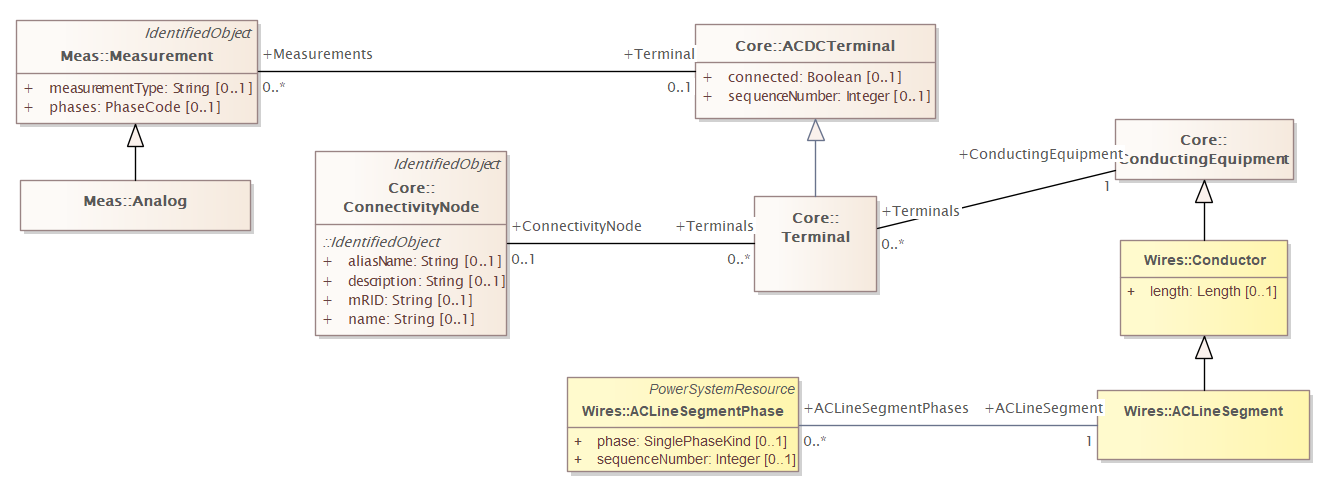

In [ ]:
network_area.get_all_edges(cim.ACLineSegment)
network_area.get_all_edges(cim.ACLineSegmentPhase)
network_area.get_all_edges(cim.Terminal)
network_area.get_all_edges(cim.Analog)

In [ ]:
for line in network_area.graph[cim.ACLineSegment].values():
    print('\n line mrid: ',line.mRID)
    print('line name:', line.name)
    print('bus 1: ', line.Terminals[0].ConnectivityNode.name)
    print('bus 2: ', line.Terminals[1].ConnectivityNode.name)

    for line_phs in line.ACLineSegmentPhases:
        print('phase:', line_phs.phase, ', sequence:', line_phs.sequenceNumber)

    for meas in line.Measurements:
        print('Measurement: ', meas.name,  ', type:', meas.measurementType, ', phases:', meas.phases)

## Example 2: Get all line impedance and asset info

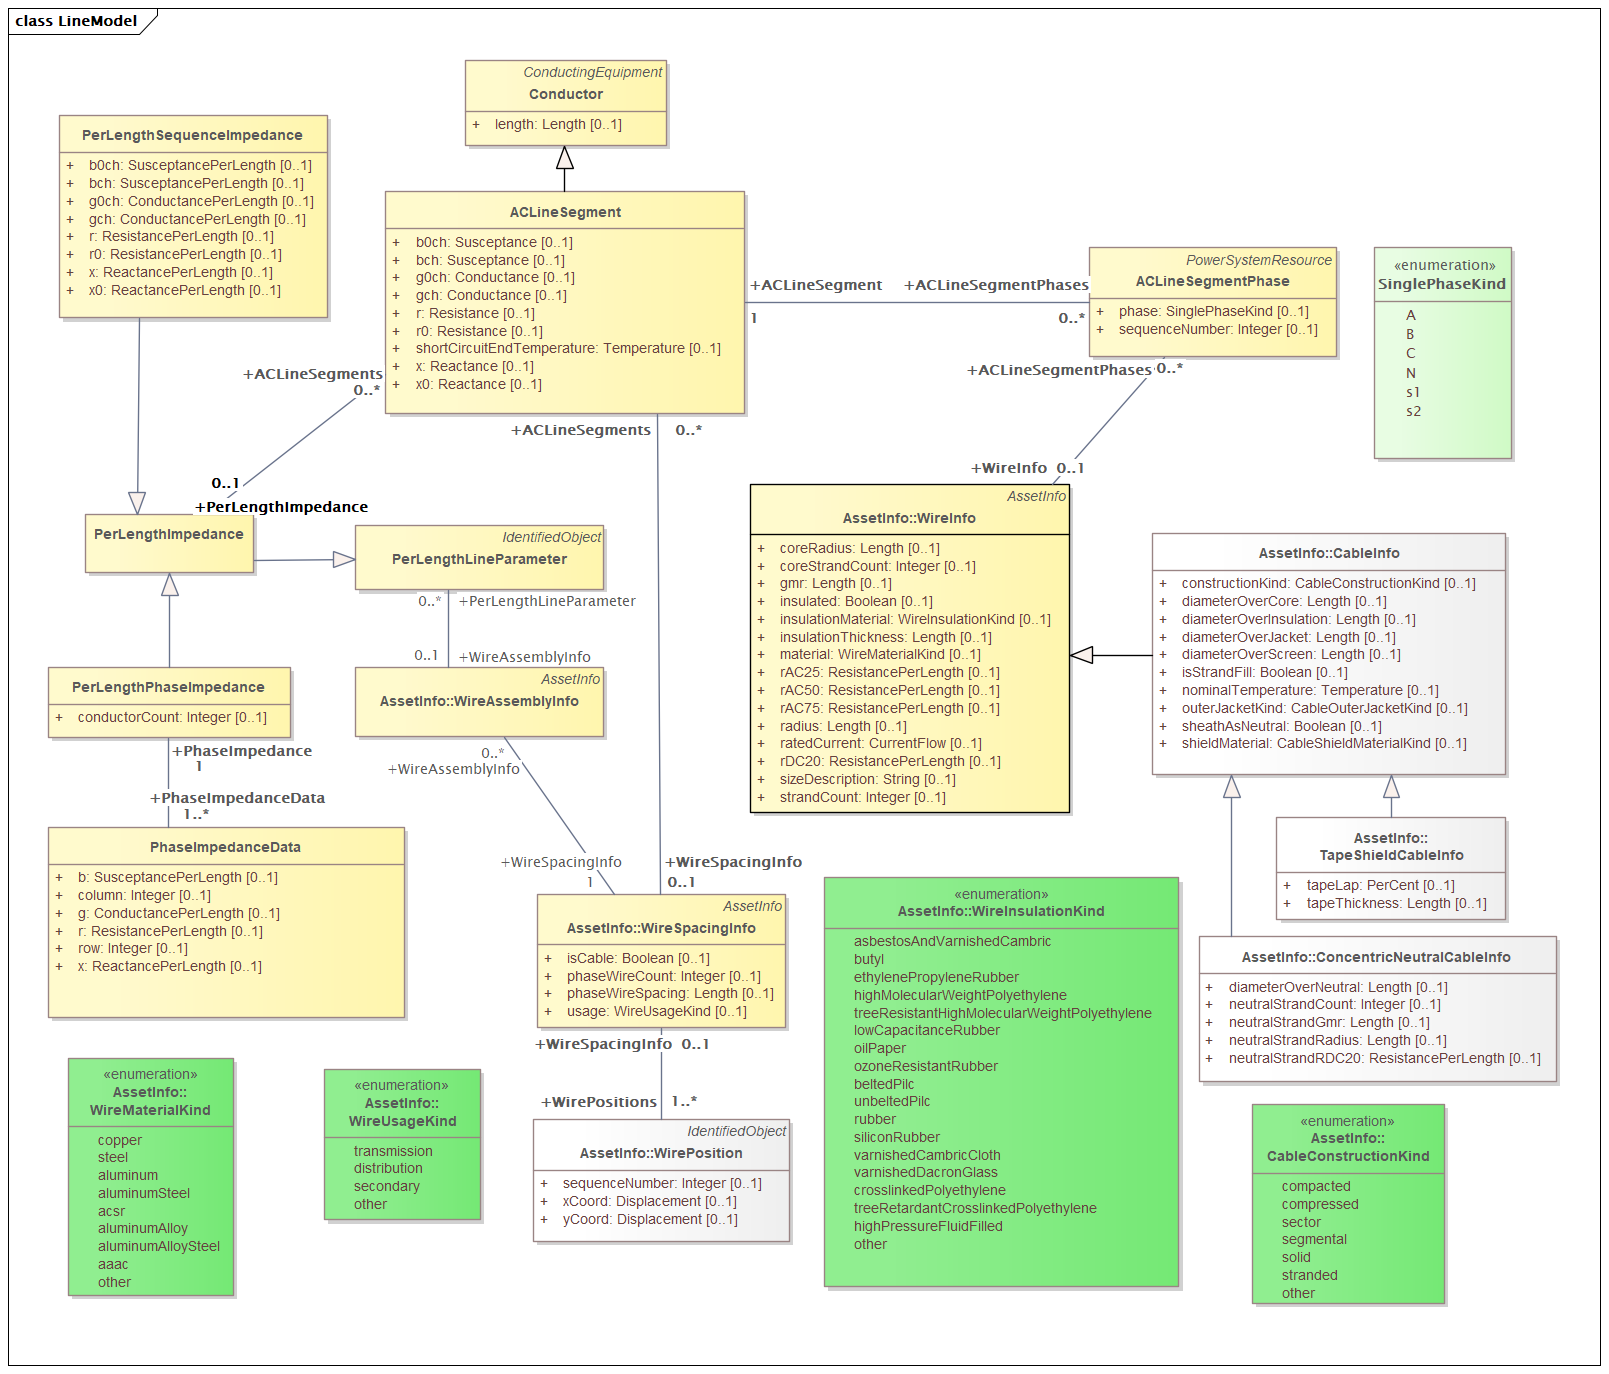

In [ ]:
network_area.get_all_edges(cim.ACLineSegment)
network_area.get_all_edges(cim.ACLineSegmentPhase)
network_area.get_all_edges(cim.PerLengthPhaseImpedance)
network_area.get_all_edges(cim.PhaseImpedanceData)
network_area.get_all_edges(cim.WireSpacingInfo)
network_area.get_all_edges(cim.WirePosition)
network_area.get_all_edges(cim.OverheadWireInfo)
network_area.get_all_edges(cim.ConcentricNeutralCableInfo)
network_area.get_all_edges(cim.TapeShieldCableInfo)
network_area.get_all_edges(cim.Terminal)

### Example 2.1: Parse by PSR:

In [ ]:
for line in network_area.graph[cim.ACLineSegment].values():
    print('\n line mrid: ', line.mRID)
    print('line name:', line.name)

    for line_phs in line.ACLineSegmentPhases:
        print('phase ', line_phs.phase, ': ', line_phs.mRID)
        if line_phs.WireInfo is not None:
            print('type: ', line_phs.WireInfo.__class__.__name__)
            print('gmr: ', line_phs.WireInfo.gmr)
            print('insulated: ', line_phs.WireInfo.insulated)

    if line.WireSpacingInfo is not None:
        for position in line.WireSpacingInfo.WirePositions:
            print('seq:', position.sequenceNumber, ' x:', position.xCoord, ' y:', position.yCoord)    

    if line.PerLengthImpedance is not None:
        for data in line.PerLengthImpedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)

### Example 2.2: Parse by Asset

In [ ]:
for impedance in network_area.graph[cim.PerLengthPhaseImpedance].values():
    print('\n name:', impedance.name)
    for data in impedance.PhaseImpedanceData:
            print('row:', data.row, 'col:', data.column, 'r:', data.r, 'x:', data.x, 'b:', data.b)
    for line in impedance.ACLineSegments:
        node1 = line.Terminals[0].ConnectivityNode
        node2 = line.Terminals[1].ConnectivityNode
        print('Line: ', line.name)
        print('Buses:', node1.name, node2.name)

In [ ]:
for cable in network_area.graph[cim.ConcentricNeutralCableInfo].values():
    print('name: ', cable.name)
    print('gmr: ', cable.gmr)
    print('insulated:', cable.insulated)
    print('diameter over jacket', cable.diameterOverJacket)
    print('diameter over neutral', cable.diameterOverNeutral)
    for line_phs in cable.ACLineSegmentPhases:
        print('\n Line:', line_phs.ACLineSegment.name)
        node1 = line_phs.ACLineSegment.Terminals[0].ConnectivityNode
        node2 = line_phs.ACLineSegment.Terminals[1].ConnectivityNode
        print('Line Phase:', line_phs.phase)
        print('Buses:', node1.name, node2.name)
        

## Get Asset Info for TransformerTank

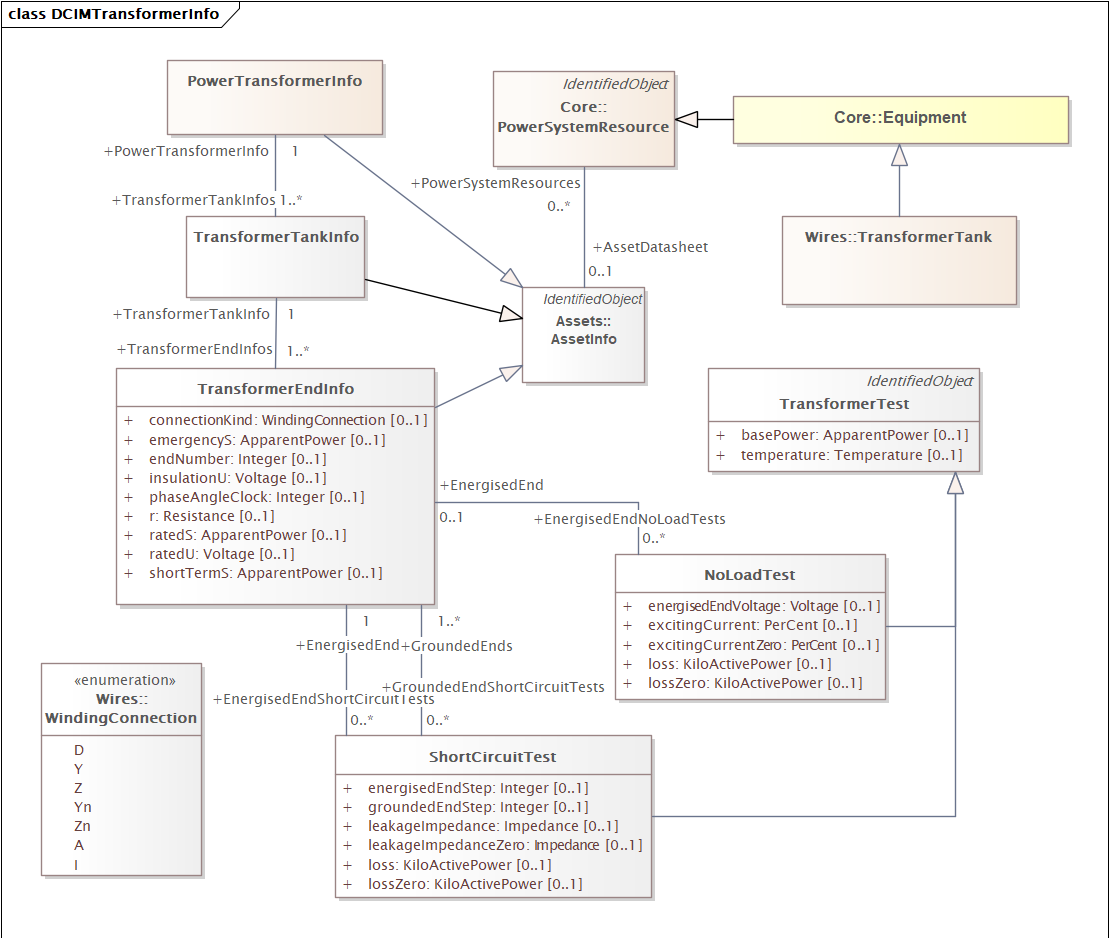

In [ ]:
network.get_all_edges(cim.TransformerTank)
network.get_all_edges(cim.TransformerTankEnd)
network.get_all_edges(cim.TransformerTankInfo)
network.get_all_edges(cim.TransformerEndInfo)
network.get_all_edges(cim.ShortCircuitTest)
network.get_all_edges(cim.NoLoadTest)
network.get_all_edges(cim.Terminal)

In [ ]:
for tank in network.graph[cim.TransformerTank].values():
    print('\n name:', tank.name)
    for end in tank.TransformerTankEnds:
        print('end number:', end.endNumber)
        node = end.Terminal.ConnectivityNode
        print('bus: ', node.name)        
    
    for end_info in tank.TransformerTankInfo.TransformerEndInfos:
        
        print('end number', end_info.endNumber)
        print('rated voltage:', end_info.ratedU)
        print('resistance:', end_info.r)
        for no_load_test in end_info.EnergisedEndNoLoadTests:
            print('exciting current:', no_load_test.excitingCurrent)

        for short_circuit_test in end_info.EnergisedEndShortCircuitTests:
            print('energisedEndStep:', short_circuit_test.energisedEndStep)
            print('groundedEndStep:', short_circuit_test.groundedEndStep)
            print('leakageImpedance:', short_circuit_test.leakageImpedance)
            
        for short_circuit_test in end_info.GroundedEndShortCircuitTests:
            print('energisedEndStep:', short_circuit_test.energisedEndStep)
            print('groundedEndStep:', short_circuit_test.groundedEndStep)
            print('leakageImpedance:', short_circuit_test.leakageImpedance)
        

## Get PowerElectronicsConnection Inverters

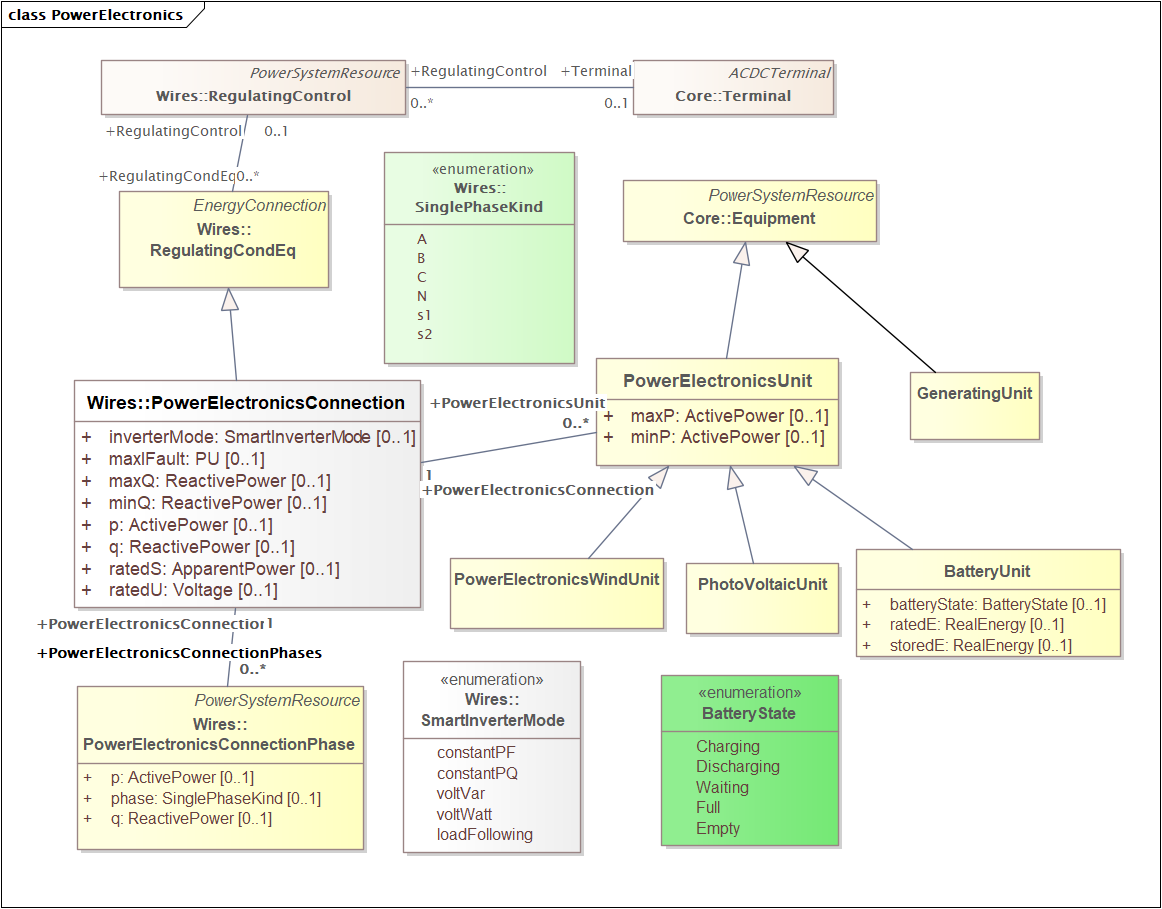

In [ ]:
secondary_area = network.switch_areas[3].secondary_areas[0]
secondary_area.get_all_edges(cim.PowerElectronicsConnection)
secondary_area.get_all_edges(cim.PowerElectronicsConnectionPhase)
secondary_area.get_all_edges(cim.BatteryUnit)
secondary_area.get_all_edges(cim.PhotovoltaicUnit)
secondary_area.get_all_edges(cim.Terminal)

pec_ids = list()

for pec in secondary_area.graph[cim.PowerElectronicsConnection].values():
    print('\n name: ', pec.name)
    print('p = ', pec.p, ', q = ', pec.q)
    for pec_phs in pec.PowerElectronicsConnectionPhases:
        print('phase ', pec_phs.phase, ':  p=', pec_phs.p, ', q=', pec_phs.q)
    
    for pec_unit in pec.PowerElectronicsUnit:
        print(pec_unit.__class__.__name__)
        if pec_unit.__class__ is cim.BatteryUnit:
            print('Stored E:', pec_unit.storedE)

In [ ]:
len(network.graph[cim.ACLineSegment].keys())

In [ ]:
for i in range(39):
    query = network.get_edges_query(cim.ACLineSegment)
    print(query)
    response = neo4j.execute(query)
    neo4j.edge_query_parser(response, "", network.graph, cim.ACLineSegment)


In [ ]:
neo4j.edge_query_parser(response, "", network.graph, cim.ACLineSegment)

In [ ]:
response

In [ ]:
import cimgraph.queries.cypher as cypher
q = (cypher.get_all_edges_cypher(feeder, ""))
result = neo4j.execute(q)

In [ ]:
len(result)

In [ ]:
cProfile.run('neo4j.execute(q)', sort='tottime')

In [ ]:
import re

In [ ]:
network.get_all_edges(cim.LoadBreakSwitch)
network.graph[cim.SwitchPhase]

In [ ]:
(network.get_all_edges(cim.ConnectivityNode))

In [ ]:
json.loads(network.__dumps__(cim.ConnectivityNode))

In [ ]:
network_area.get_all_edges(cim.ACLineSegmentPhase)
network.pprint(cim.ACLineSegmentPhase)

In [ ]:
cim_class = cim.ACLineSegment
attribute = 'r'
attribute_type = cim_class.__dataclass_fields__[attribute].type
print(attribute_type)

In [ ]:
if '\'' in attribute_type: #handling inconsistent '' marks in data profile
    at_cls = re.match(r'\[\'(.*)\']',attribute_type)
    attribute_class = at_cls.group(1)
else:        
    at_cls = re.match(r'\[(.*)]',attribute_type)
    attribute_class = at_cls.group(1)

In [ ]:
at_cls = re.match(r'Optional\[(.*)]',attribute_type)

In [ ]:
attribute_type.split('[')

In [ ]:
import math
x = 0
cim_class = cim.ACLineSegmentPhase
mrid_list = list(network.graph[cim_class].keys())
num_nodes = len(mrid_list)
for index in range(math.ceil(len(mrid_list)/100)):
    print(index*100, (index+1)*100)

mrid_list[1100:1200]


In [ ]:
print(cypher_message)

In [ ]:
cim.ACLineSegment().Measurements

In [ ]:
import os
import json
import time

from gridappsd import GridAPPSD, topics as t


os.environ['GRIDAPPSD_USER'] = 'system'
os.environ['GRIDAPPSD_PASSWORD'] = 'manager'
gapps = GridAPPSD()
assert gapps.connected
gapps_log = gapps.get_logger()


In [ ]:
message = network.get_edges_query(cim.PhaseImpedanceData)
gapps.query_data( message)

In [ ]:
file = "file.xml"
f"call n10s.rdf.import.fetch( {file}, \"RDF/XML\") "

In [ ]:
# Import OpenDSS Direct
import opendssdirect as dss
# Load IEEE 13 Node OpenDSS Sample Case

file = "../smart_ds/Master.dss"
dss.run_command(f'Redirect {file}')
# dss.run_command('Compile ./dss/IEEE13Node.dss')
# dss.Solution.Solve()

# Convert to CIM 100 XML
dss.run_command(f'export cim100')


In [ ]:
graph = neo4j.create_new_graph(feeder)

In [ ]:
loop = asyncio.get_running_loop()
future = asyncio.run(neo4j.create_new_graph(feeder))
graph = future.result()

In [ ]:
import asyncio
asyncio.run(neo4j.execute(network_nj.get_edges_query(cim.ACLineSegment)))

In [ ]:
graph[cim.ACLineSegment]

In [ ]:
network_nj.pprint(cim.ACLineSegment)